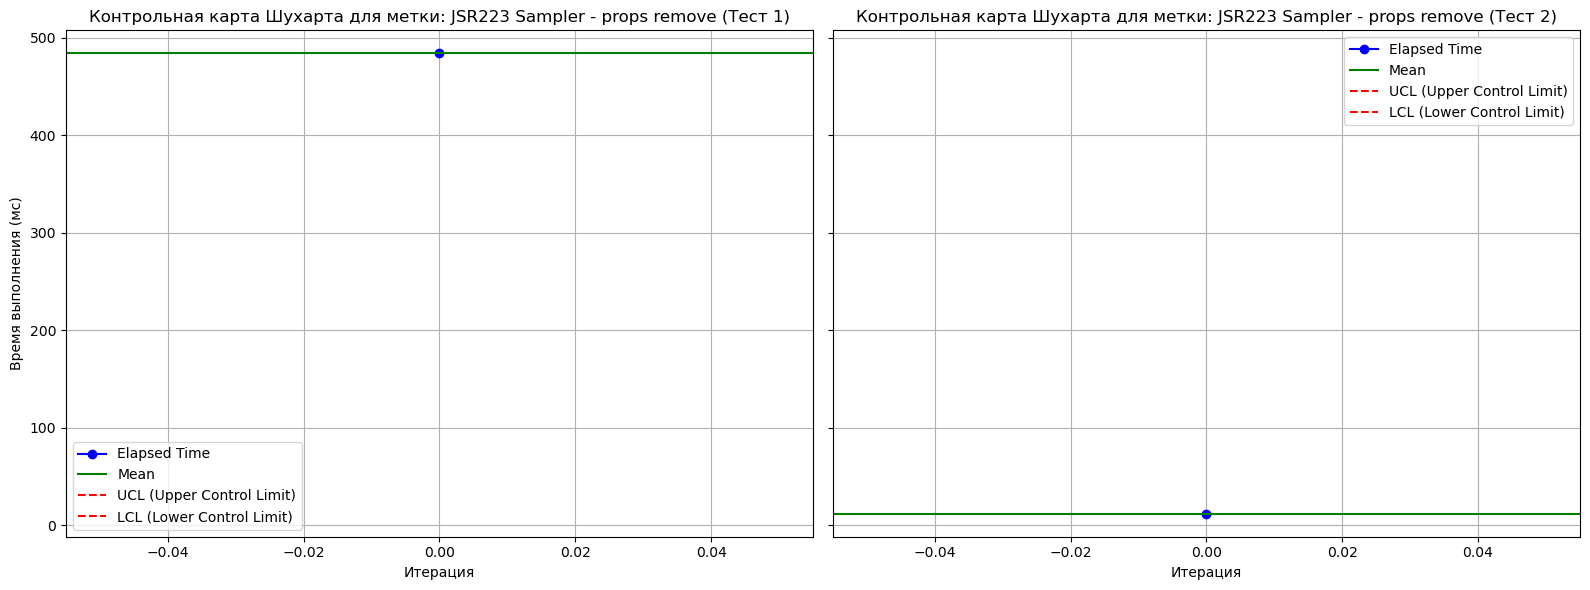

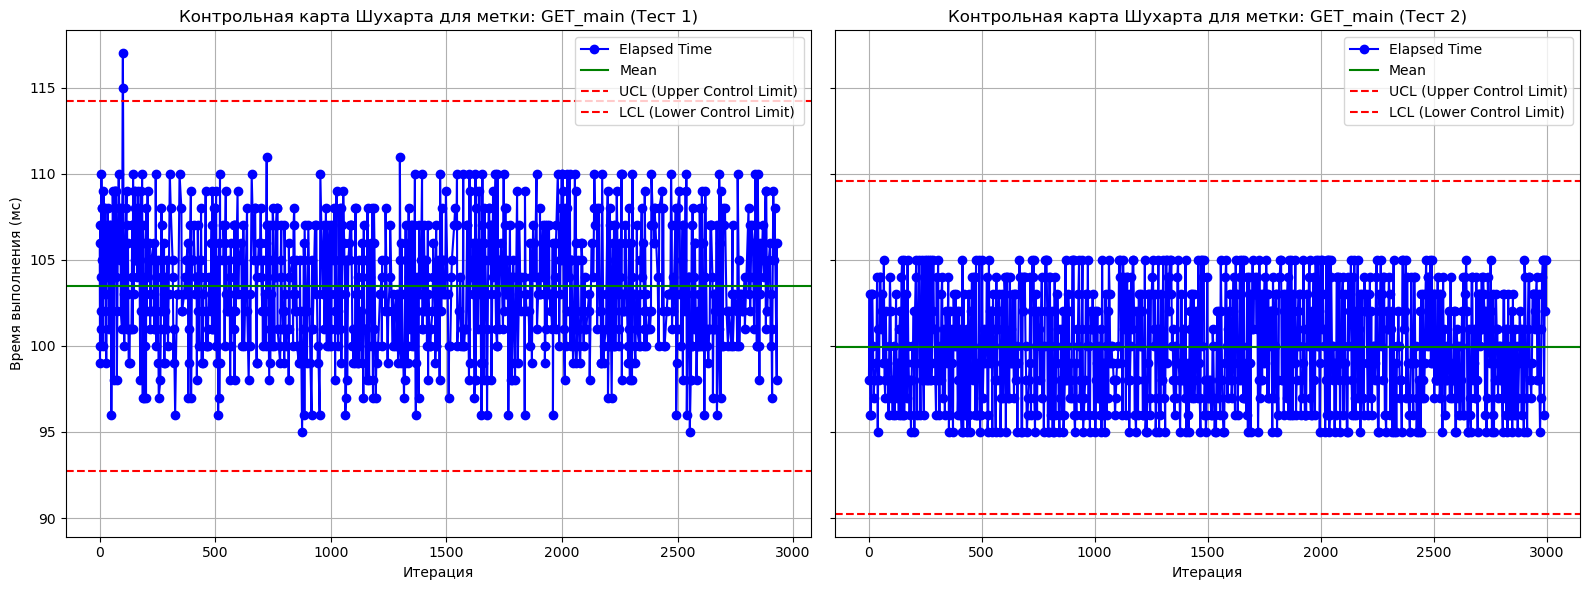

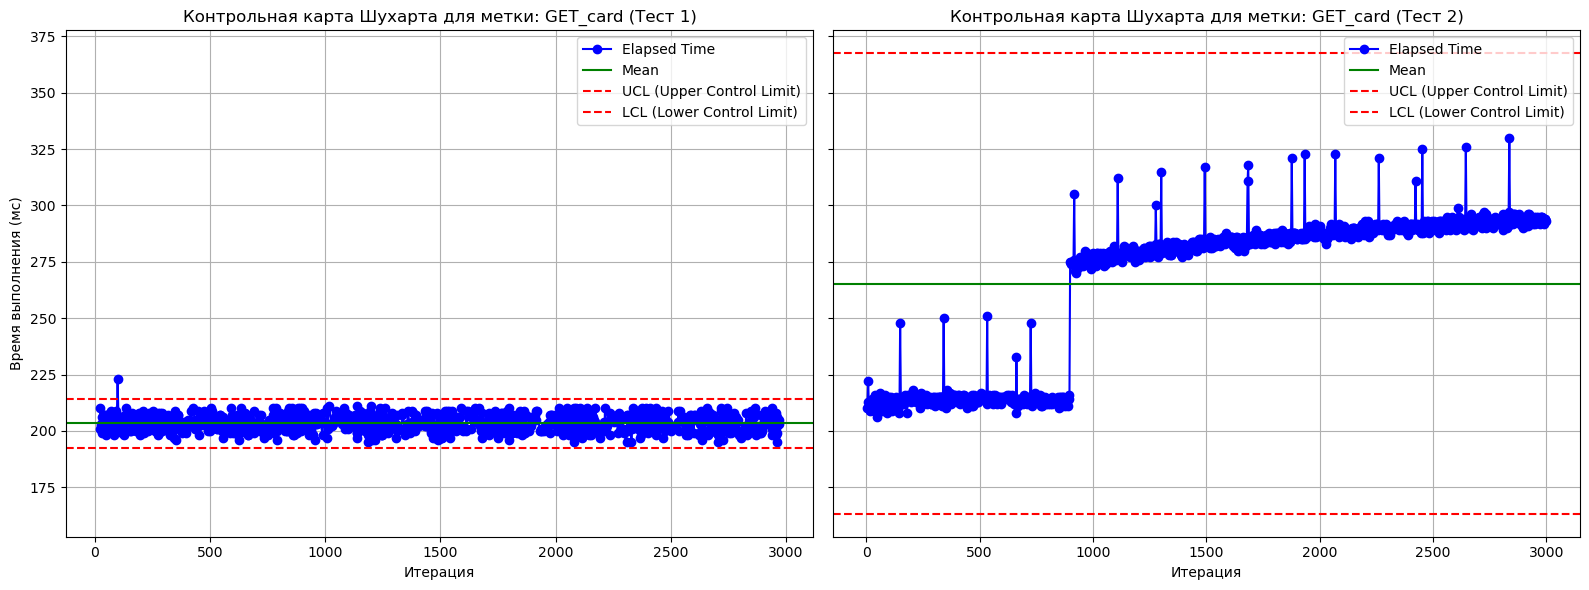

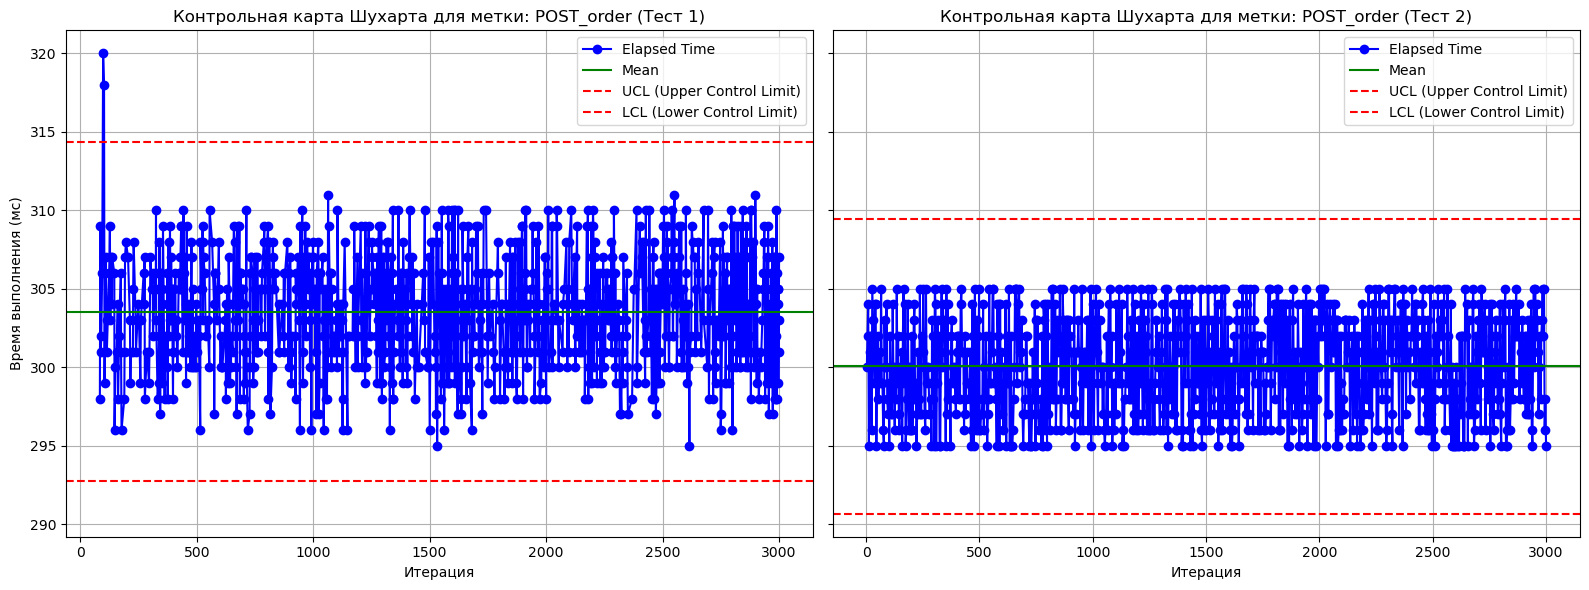

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1: Чтение данных из CSV файлов
data = pd.read_csv("/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api.jtl")
data_new_release = pd.read_csv("/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api_power.jtl")

# Шаг 2: Получаем уникальные метки (labels) из первого набора данных
unique_labels = data['label'].unique()

# Шаг 3: Построение контрольных карт Шухарта для обоих наборов данных
for label in unique_labels:
    # Отфильтруем данные по текущей метке для обоих тестов
    filtered_data = data[data['label'] == label]
    filtered_data_new_release = data_new_release[data_new_release['label'] == label]
    
    # Получим время выполнения для обоих тестов
    elapsed_times = filtered_data['elapsed']
    elapsed_times_new_release = filtered_data_new_release['elapsed']

    # Рассчитаем статистику для контрольных карт для обоих тестов
    mean_elapsed = elapsed_times.mean()
    std_elapsed = elapsed_times.std()
    UCL = mean_elapsed + 3 * std_elapsed
    LCL = mean_elapsed - 3 * std_elapsed

    UCL = mean_elapsed + 3 * std_elapsed
    LCL = mean_elapsed - 3 * std_elapsed

    mean_elapsed_new_release = elapsed_times_new_release.mean()
    std_elapsed_new_release = elapsed_times_new_release.std()
    UCL_new_release = mean_elapsed_new_release + 3 * std_elapsed_new_release
    LCL_new_release = mean_elapsed_new_release - 3 * std_elapsed_new_release

    # Шаг 4: Построение графиков с использованием subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # График для первого теста
    ax[0].plot(elapsed_times.index, elapsed_times, marker='o', linestyle='-', color='b', label='Elapsed Time')
    ax[0].axhline(y=mean_elapsed, color='g', linestyle='-', label='Mean')
    ax[0].axhline(y=UCL, color='r', linestyle='--', label='UCL (Upper Control Limit)')
    ax[0].axhline(y=LCL, color='r', linestyle='--', label='LCL (Lower Control Limit)')
    ax[0].set_title(f'Контрольная карта Шухарта для метки: {label} (Тест 1)')
    ax[0].set_xlabel('Итерация')
    ax[0].set_ylabel('Время выполнения (мс)')
    ax[0].legend()
    ax[0].grid(True)

    # График для второго теста
    ax[1].plot(elapsed_times_new_release.index, elapsed_times_new_release, marker='o', linestyle='-', color='b', label='Elapsed Time')
    ax[1].axhline(y=mean_elapsed_new_release, color='g', linestyle='-', label='Mean')
    ax[1].axhline(y=UCL_new_release, color='r', linestyle='--', label='UCL (Upper Control Limit)')
    ax[1].axhline(y=LCL_new_release, color='r', linestyle='--', label='LCL (Lower Control Limit)')
    ax[1].set_title(f'Контрольная карта Шухарта для метки: {label} (Тест 2)')
    ax[1].set_xlabel('Итерация')
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()
